In [1]:
from observed_dict_rs import Node, Edge, Vertex

g = Vertex()

node1 = g.add_node('node1', {'value': 1})
node2 = g.add_node('node2', {'value': 2})
node3 = g.add_node('node3', {'value': 3})
node4 = g.add_node('node4', {'value': 4})
node5 = g.add_node('node5', {'value': 5})

edge1 = g.add_edge('node1', 'node2', {'weight': 1.0})
edge2 = g.add_edge('node2', 'node3', {'weight': 2.0})
edge3 = g.add_edge('node1', 'node3', {'weight': 3.0})
edge4 = g.add_edge('node3', 'node4', {'weight': 4.0})
edge5 = g.add_edge('node4', 'node5', {'weight': 4.0})

In [2]:
# Test the new shortest_path_bfs method
path_vertex = g.shortest_path_bfs('node1', 'node3')
print(f"Shortest path from node1 to node3: {path_vertex}")

# Test with max_depth limit
try:
    path_vertex_limited = g.shortest_path_bfs('node1', 'node3', max_depth=1)
except ValueError as e:
    print(f"Expected error with max_depth=1: {e}")

# Test direct path (node1 to node2)
direct_path = g.shortest_path_bfs('node1', 'node5')
print(f"Direct path from node1 to node2: {direct_path}")

Shortest path from node1 to node3: Vertex(node1, node3)
Direct path from node1 to node2: Vertex(node5, node1, node4, node3)


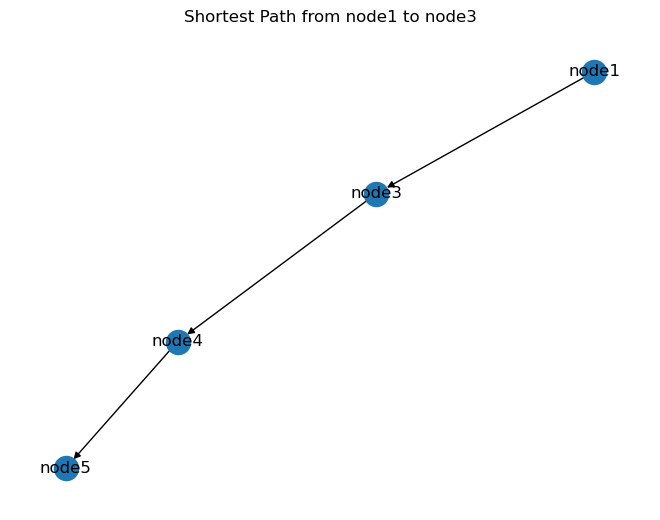

In [3]:
import networkx as nx

nx_graph2 = direct_path.to_networkx()
nx.draw(nx_graph2, with_labels=True)
import matplotlib.pyplot as plt
plt.title("Shortest Path from node1 to node3")
plt.show()

In [4]:
# Test the updated shortest_path_bfs method to ensure it only returns path nodes
print("Testing updated shortest_path_bfs method:")
print("Original graph has nodes:", g.keys())

# Test shortest path from node1 to node3
path_vertex = g.shortest_path_bfs('node1', 'node3')
print(f"\nShortest path from node1 to node3 contains nodes: {path_vertex.keys()}")
print(f"Path representation: {path_vertex}")

# Test direct path (node1 to node2)
direct_path = g.shortest_path_bfs('node1', 'node2')
print(f"\nDirect path from node1 to node2 contains nodes: {direct_path.keys()}")
print(f"Path representation: {direct_path}")

# Test same node path
same_path = g.shortest_path_bfs('node1', 'node1')
print(f"\nPath from node1 to itself contains nodes: {same_path.keys()}")
print(f"Path representation: {same_path}")

Testing updated shortest_path_bfs method:
Original graph has nodes: ['node2', 'node1', 'node5', 'node3', 'node4']

Shortest path from node1 to node3 contains nodes: ['node1', 'node3']
Path representation: Vertex(node1, node3)

Direct path from node1 to node2 contains nodes: ['node2', 'node1']
Path representation: Vertex(node2, node1)

Path from node1 to itself contains nodes: ['node1']
Path representation: Vertex(node1)


In [5]:
# Debug: Check what's actually in direct_path
print("direct_path keys:", direct_path.keys())
print("direct_path node count:", direct_path.node_count())

# Check what to_networkx creates
nx_graph2 = direct_path.to_networkx()
print("\nNetworkX graph nodes:", list(nx_graph2.nodes()))
print("NetworkX graph edges:", list(nx_graph2.edges()))
print("NetworkX graph node count:", nx_graph2.number_of_nodes())
print("NetworkX graph edge count:", nx_graph2.number_of_edges())

# Check edges in the path nodes
for node_id in direct_path.keys():
    node = direct_path.get_node(node_id)
    print(f"\nNode {node_id} edges:")
    for edge in node.edges:
        to_node_id = edge.to.id
        print(f"  -> {to_node_id}")

direct_path keys: ['node2', 'node1']
direct_path node count: 2

NetworkX graph nodes: ['node2', 'node1']
NetworkX graph edges: [('node1', 'node2')]
NetworkX graph node count: 2
NetworkX graph edge count: 1

Node node2 edges:

Node node1 edges:
  -> node2


Updated test:
direct_path nodes: ['node2', 'node1']
direct_path node count: 2

Node node2 edges in path vertex:

Node node1 edges in path vertex:
  -> node2

NetworkX graph from path:
Nodes: ['node2', 'node1']
Edges: [('node1', 'node2')]
Node count: 2
Edge count: 1


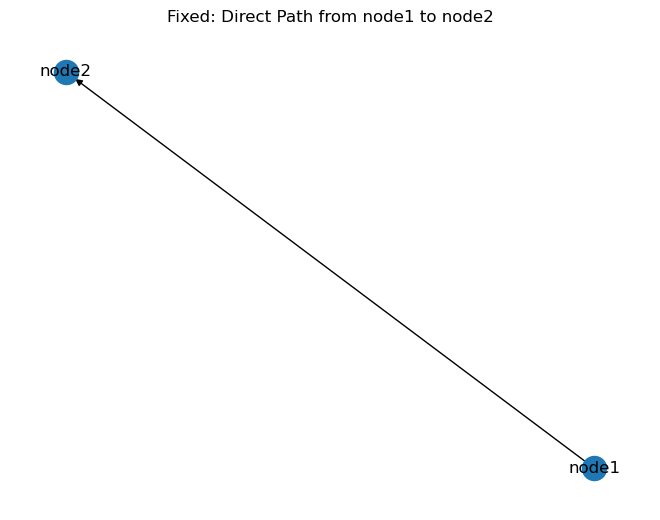

In [6]:
# Restart test with updated implementation
from observed_dict_rs import Node, Edge, Vertex


# Test the updated shortest_path_bfs
direct_path = g.shortest_path_bfs('node1', 'node2')
print("Updated test:")
print(f"direct_path nodes: {direct_path.keys()}")
print(f"direct_path node count: {direct_path.node_count()}")

# Check edges in the path nodes
for node_id in direct_path.keys():
    node = direct_path.get_node(node_id)
    print(f"\nNode {node_id} edges in path vertex:")
    for edge in node.edges:
        to_node_id = edge.to.id
        print(f"  -> {to_node_id}")

# Test NetworkX conversion
import networkx as nx
nx_graph = direct_path.to_networkx()
print(f"\nNetworkX graph from path:")
print(f"Nodes: {list(nx_graph.nodes())}")
print(f"Edges: {list(nx_graph.edges())}")
print(f"Node count: {nx_graph.number_of_nodes()}")
print(f"Edge count: {nx_graph.number_of_edges()}")

# Visualize
nx.draw(nx_graph, with_labels=True)
import matplotlib.pyplot as plt
plt.title("Fixed: Direct Path from node1 to node2")
plt.show()

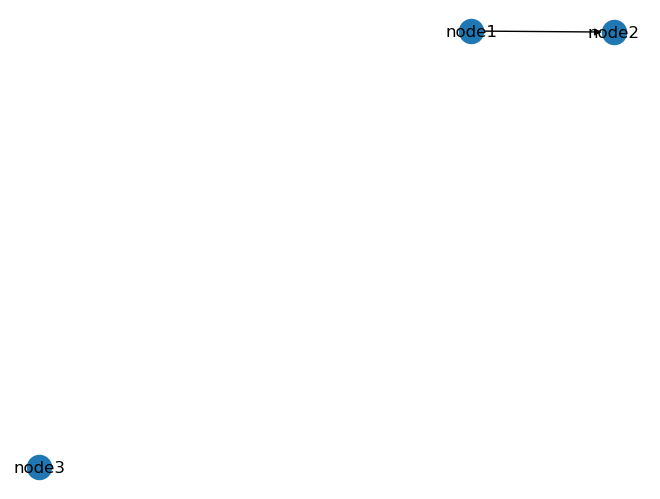

In [7]:

nx_graph3 = direct_path.expand(g, 1).to_networkx()

# plot
nx.draw(nx_graph3, with_labels=True)

=== EXPAND METHOD DEBUG ===
Original graph structure:
Full graph nodes: ['node2', 'node1', 'node5', 'node3', 'node4']
Full graph node count: 5

Edges in original graph:
Node node2 edges:
  -> node3
Node node1 edges:
  -> node2
  -> node3
Node node5 edges:
Node node3 edges:
  -> node4
Node node4 edges:
  -> node5

Testing direct_path (should contain node1 and node2):
direct_path nodes: ['node2', 'node1']
direct_path node count: 2

Edges in direct_path:
Node node2 edges:
Node node1 edges:
  -> node2

Testing expand method:
expanded_path nodes: ['node2', 'node3', 'node1']
expanded_path node count: 3

Edges in expanded_path:
Node node2 edges:
Node node3 edges:
Node node1 edges:
  -> node2

NetworkX graph from expanded path:
Nodes: ['node2', 'node3', 'node1']
Edges: [('node1', 'node2')]


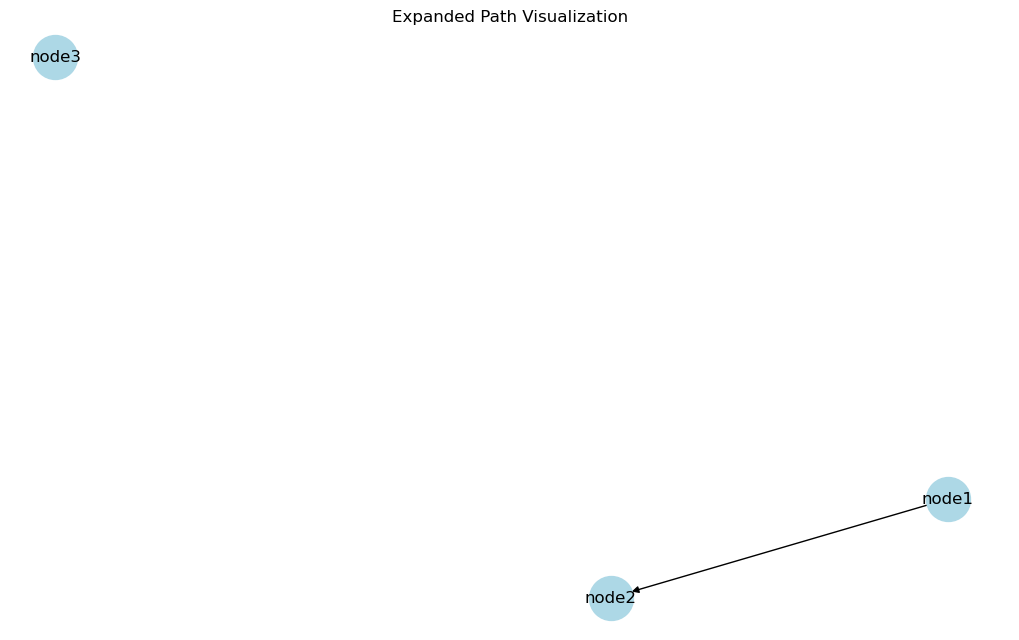

In [8]:
# Comprehensive test of the expand method
print("=== EXPAND METHOD DEBUG ===")
print("Original graph structure:")
print(f"Full graph nodes: {g.keys()}")
print(f"Full graph node count: {g.node_count()}")

# Show edges in original graph
print("\nEdges in original graph:")
for node_id in g.keys():
    node = g.get_node(node_id)
    print(f"Node {node_id} edges:")
    for edge in node.edges:
        to_node_id = edge.to.id
        print(f"  -> {to_node_id}")

print("\n" + "="*50)
print("Testing direct_path (should contain node1 and node2):")
direct_path = g.shortest_path_bfs('node1', 'node2')
print(f"direct_path nodes: {direct_path.keys()}")
print(f"direct_path node count: {direct_path.node_count()}")

# Show edges in direct_path
print("\nEdges in direct_path:")
for node_id in direct_path.keys():
    node = direct_path.get_node(node_id)
    print(f"Node {node_id} edges:")
    for edge in node.edges:
        to_node_id = edge.to.id
        print(f"  -> {to_node_id}")

print("\n" + "="*50)
print("Testing expand method:")
expanded_path = direct_path.expand(g, 1)
print(f"expanded_path nodes: {expanded_path.keys()}")
print(f"expanded_path node count: {expanded_path.node_count()}")

# Show edges in expanded_path
print("\nEdges in expanded_path:")
for node_id in expanded_path.keys():
    node = expanded_path.get_node(node_id)
    print(f"Node {node_id} edges:")
    for edge in node.edges:
        to_node_id = edge.to.id
        print(f"  -> {to_node_id}")

# Visualize the expanded graph
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = expanded_path.to_networkx()
print(f"\nNetworkX graph from expanded path:")
print(f"Nodes: {list(nx_graph.nodes())}")
print(f"Edges: {list(nx_graph.edges())}")

plt.figure(figsize=(10, 6))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=1000)
plt.title("Expanded Path Visualization")
plt.show()